<h1><center>CSCI - 6409 - The Process of Data Science - Fall 2022</h1></center>
<h1><center>Project: Supermarket sales forecasting with sentiment analysis indicators and technical indicators</h1></center>

<b>Akshay Sharma</b>  
B00925863  

<b>Mayuri Chilekar</b>  
B00925385  

<b>David Yabar</b></br>
B00902339


<b>Deepak Hariharan</b>  
B00928025


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing data and requisite libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from google.colab import drive
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import math
from textwrap import wrap
import warnings
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import re
from nltk.probability import FreqDist
import itertools
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sb
from scipy.stats import spearmanr
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, learning_curve, ShuffleSplit
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
df_twitter=pd.read_csv("Cleaned_tweet.csv")
df_twitter.convert_dtypes()

,Unnamed: 0,Date,tweet
0,142467,2010-02-05,Hiring a President Club Sales Executive at Wea...
1,140804,2010-02-05,"Assisted Sales - Computers - Farmington Hills,..."
2,140803,2010-02-05,"Assisted Sales - Computers - Grosse Pointe, MI..."
3,140802,2010-02-05,Sales-Hospital Account Manager Washington DC /...
4,140801,2010-02-05,"Assisted Sales - Computers - Westland, MI http..."
...,...,...,...
192349,136805,2012-10-26,2nd place in the national team sales competiti...
192350,136806,2012-10-26,"@esohvee erry friday. I don't buy stuff, just ..."
192351,136807,2012-10-26,#GPS #Navigation #2: USG-BU353: USG-BU353 by U...
192352,136794,2012-10-26,Aye i aint into this presidential bullshit buy...


In [ ]:
#Using Convert Dtype function from pandas to preprocess for the datatype
df_train=pd.read_csv("Walmart.csv")
df_train.convert_dtypes()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.9,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.24217,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.5,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.0,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
#imporing ntlk dependencies for preprocessing
nltk.download('popular')
nltk.download("book")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### Data Preprocessing


#####Function for preprocessing the twitter data i.e. removing stop words and lemmatizing the text

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  lemmatize_data = []
  data = []
  for s in text:
    tokenization = word_tokenize(s) 
    for i in range(len(tokenization)):
        tokenization[i] = lemmatizer.lemmatize(tokenization[i])
    token = ' '.join(tokenization)
    lemmatize_data.append(token)
    #print(tokenization)
    #   #  token1 = ' '.join(tokenization)
    #    data.append(lemmatize_data[i])
  return lemmatize_data

In [ ]:
#Removing stop words according to ntlk stopwords
from tqdm import tqdm
from nltk.corpus import stopwords 
filtered_sent = []
stop_words = set(stopwords.words('english')) 
for i in tqdm(df_twitter["tweet"].astype(str)):
  word_tokens = word_tokenize(i.lower()) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  filtered_sent.append(filtered_sentence)
df_twitter["filtered_sentence"] = filtered_sent
df_twitter["filtered_sentence"] = df_twitter['filtered_sentence'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
df_twitter["lemmatized_text"] = lemmatize(df_twitter["filtered_sentence"])

100%|██████████| 192354/192354 [00:45<00:00, 4181.71it/s]


Checking the distribution of words in the twitter data and lets see if they have any relevant words for the sales

In [ ]:
#Checking for all words in the corpus
text = " ".join(word for word in df_twitter.lemmatized_text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 13829068 words in the combination of all review.


In [ ]:
## Storing NLTK English stop word list + conainter for results
stopwords = nltk.corpus.stopwords.words('english')
tokens_stopped = []

## Check if token in stop word list before adding to new list
for word in word_tokenize(text.lower()):
    if word in stopwords:
        pass
    else:
        tokens_stopped.append(word)

Generating word cloud to check the most frequent occurance of a textual word.

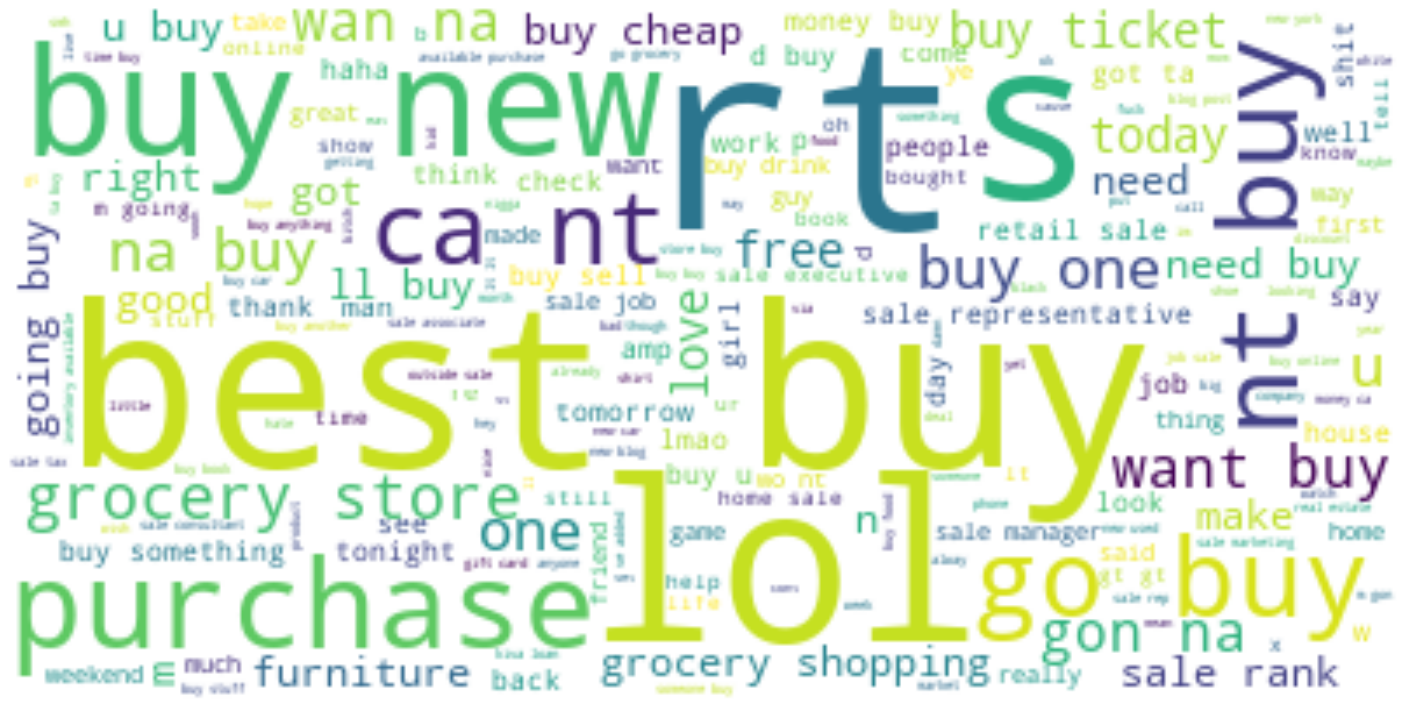

In [ ]:
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(25,150))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

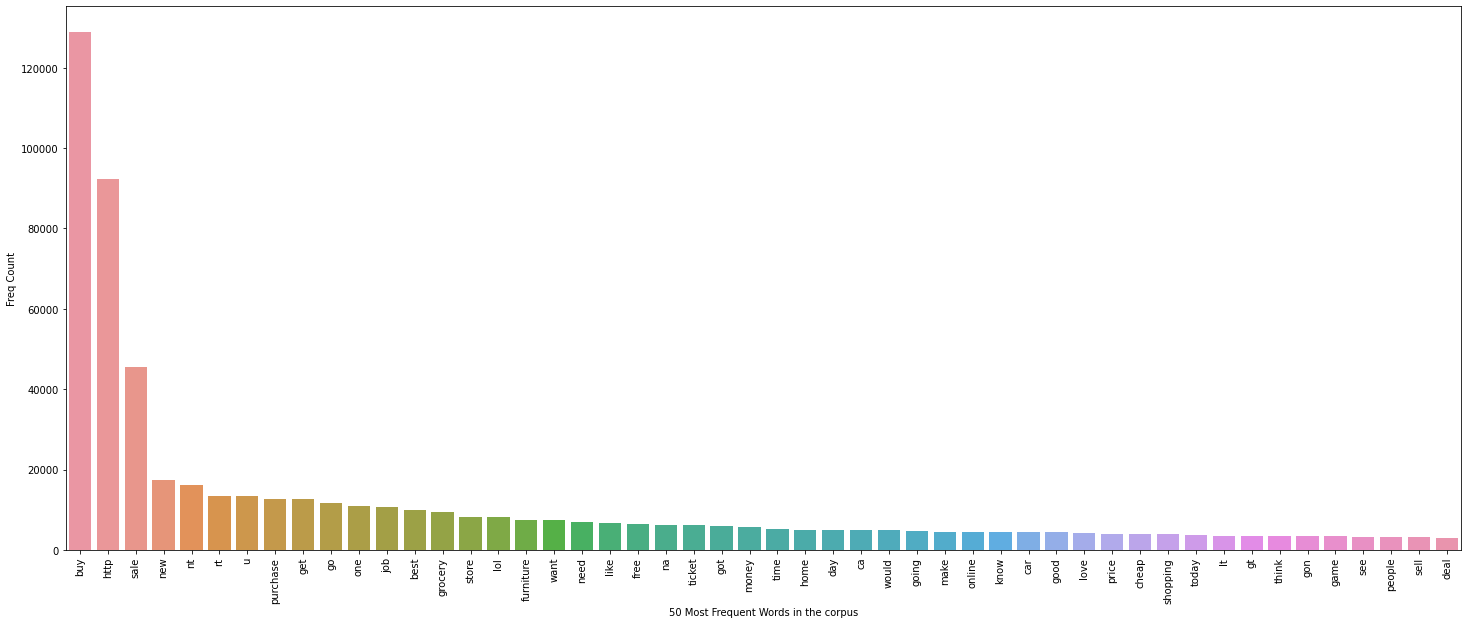

In [ ]:
#Plotting the distribution of 50 most frequent words in the corpus
fdist = FreqDist(tokens_stopped).most_common(50)
fdist = pd.Series(dict(fdist))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
plt.xlabel("50 Most Frequent Words in the corpus")
plt.ylabel("Freq Count")
plt.xticks(rotation=90);

### We can observe that most of the words in corpus are related to sales, so we will try to build indicators which can help predict the final sales for this type of data

###Building Indicators using sentiment analysis of twitter data

In [ ]:
sentiment = SentimentIntensityAnalyzer() #Importing sentiment intensity analyzer from vader sentiment analysis library

In [ ]:
from tqdm import tqdm #Extracting how strong are the positve,neutral and negative sentiments in the data
b=[]
for i in tqdm(df_twitter["lemmatized_text"]):
  b.append(sentiment.polarity_scores(i))

100%|██████████| 192354/192354 [00:16<00:00, 12015.00it/s]


In [ ]:
df_twitter[['neg', 'neu', 'pos', 'compound']]=pd.DataFrame(b)

In [ ]:
df_twitter.columns

Index(['Unnamed: 0', 'Date', 'tweet', 'filtered_sentence', 'lemmatized_text',
       'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [ ]:
df_twitter=df_twitter[['Date', 'tweet', 'filtered_sentence', 'lemmatized_text',
       'neg', 'neu', 'pos', 'compound']]

In [ ]:
df_twitter.sort_values(by="Date",inplace=True)
df_twitter.head(10)

,Date,tweet,filtered_sentence,lemmatized_text,neg,neu,pos,compound
0,2010-02-05,Hiring a President Club Sales Executive at Wea...,hiring president club sales executive wealth m...,hiring president club sale executive wealth ma...,0.000,0.802,0.198,0.4939
3337,2010-02-05,"==&gt;Google Has Weaker Brand than Many Think,...",gt google weaker brand many think given ne...,gt google weaker brand many think given nexus ...,0.193,0.667,0.140,-0.2023
3336,2010-02-05,Yahoo! HotJobs: Outside Sales Representative-C...,yahoo hotjobs outside sales representativece...,yahoo hotjobs outside sale representativecentr...,0.000,1.000,0.000,0.0000
3335,2010-02-05,Yahoo! HotJobs: Outside Sales Representative-C...,yahoo hotjobs outside sales representativece...,yahoo hotjobs outside sale representativecentr...,0.000,1.000,0.000,0.0000
3334,2010-02-05,DA MOST FUNNIEST THING I HAVE EVER SAW IN MY L...,da funniest thing ever saw life nigga play lik...,da funniest thing ever saw life nigga play lik...,0.087,0.561,0.352,0.8176
3333,2010-02-05,@jimmycarr well why don't you buy them?,jimmycarr well nt buy,jimmycarr well nt buy,0.000,0.588,0.412,0.2732
3332,2010-02-05,"Peter, , has given loan amount of 225 to Ayde...",peter given loan amount aydee ayacucho pe...,peter given loan amount aydee ayacucho peru re...,0.000,1.000,0.000,0.0000
3331,2010-02-05,how do we find homes in foreclosure to buy and...,find homes foreclosure buy specifics need qual...,find home foreclosure buy specific need qualif...,0.143,0.857,0.000,-0.1280
3330,2010-02-05,"Peter, , has given loan amount of 850 to Emil...",peter given loan amount emilia koforidua ...,peter given loan amount emilia koforidua ghana...,0.000,1.000,0.000,0.0000
3329,2010-02-05,Grocery shopping ranks among the worst part of...,grocery shopping ranks among worst part life ...,grocery shopping rank among worst part life kn...,0.464,0.536,0.000,-0.8316


### Merging the twitter sentiment data witn technical indicator data of walmart sales

In [ ]:
#### EDA and Preprocessing the twitter data

In [ ]:
df_train.sort_values(by="Date",inplace=True)
df_train['Date']=pd.to_datetime(df_train['Date'],format='%d-%m-%Y')
# df=df.astype({'Date': 'datetime'})
df_train=df_train.astype({'Holiday_Flag': 'string'})
df_train=df_train.astype({'Store': 'string'})

In [ ]:
#Checking dtypes of our data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 5208 to 1763
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   string        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   string        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), string(2)
memory usage: 452.5 KB


In [ ]:
#Function for building the feature report of our data
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        #NOTE: ignore warnings for empty features
    #    with warnings.catch_warnings():
    #        warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [ ]:
build_continuous_features_report(df_train)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Weekly_Sales,6435,0.0,6435,209986.250,553350.105,1.046965e+06,960746.040000,1.420159e+06,3.818686e+06,564366.622054
Temperature,6435,0.0,3528,-2.060,47.460,6.066378e+01,62.670000,7.494000e+01,1.001400e+02,18.444933
Fuel_Price,6435,0.0,892,2.472,2.933,3.358607e+00,3.445000,3.735000e+00,4.468000e+00,0.459020
CPI,6435,0.0,2145,126.064,131.735,1.715784e+02,182.616521,2.127433e+02,2.272328e+02,39.356712
Unemployment,6435,0.0,349,3.879,6.891,7.999151e+00,7.874000,8.622000e+00,1.431300e+01,1.875885


#### We can observe that there are no missing values in our data
##### Since the twitter data is grouped on date so we will group the technical indicator data on dates and will take the mean of numerical values since its the expected value most of the time for modelling purposes.

In [ ]:
df_twitter=df_twitter.groupby("Date").mean()
df_twitter.reset_index(inplace=True)
df_train=df_train.groupby("Date").mean()
# df_train.drop("Store",axis=1,inplace=True)

In [ ]:
df_train.reset_index(inplace=True)

In [ ]:
df_twitter=df_twitter[["Date","compound"]] #for modelling purpose we are considering the compound values since it can be used to get the sentiment score for positive,negative and neutral commnents

df_twitter_e4=df_twitter

In [ ]:
df_train['Date']=pd.to_datetime(df_train['Date'],format='%d-%m-%Y')
df_train.sort_values(by="Date")
df_twitter.sort_values(by="Date")
df_train=df_train[df_train["Date"].isin(df_twitter["Date"])]
df_train["sentiment_score"]=df_twitter["compound"]
df_train.dropna(inplace=True)

<ipython-input-32-b44211234581>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["sentiment_score"]=df_twitter["compound"]
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
## Preprocessing the datafile since range for every column is different
from sklearn import preprocessing

In [ ]:
df_train.columns

Index(['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'sentiment_score'],
      dtype='object')

In [ ]:
scaler=preprocessing.MinMaxScaler(feature_range=(0, 2))
scaled_df=pd.DataFrame(scaler.fit_transform(df_train[['Weekly_Sales','Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'sentiment_score']]))
scaled_df.columns=['Weekly_Sales','Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'sentiment_score']

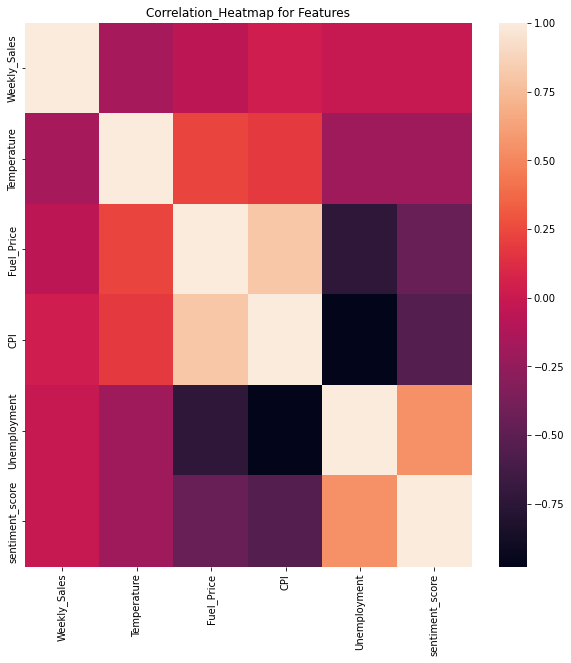

In [ ]:
#Checking for correlation among the different variables
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax=sns.heatmap(scaled_df.corr())
plt.title("Correlation_Heatmap for Features")
plt.show()

### Experiment 2  - checking for significance of twitter indicators 

#### We can infer that some sentiment scores is correlated with some features but they are not strongly correlated
### We will perform chi2 information test to check if what features are significant from modelling perspective

In [ ]:
from sklearn.feature_selection import chi2
#Creating Test and Train Split for feature selection using chi2 and mutual information test
Xtrain, Xtest, ytrain, ytest = train_test_split(df_train[['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'sentiment_score']], df_train[['Weekly_Sales']], test_size=0.2, random_state=1)

In [ ]:
#Creating Function for feature selection
def selectfeatures(Xtrain, ytrain, Xtest,sc):
	feat_sel = SelectKBest(score_func=sc, k='all')
	feat_sel.fit(Xtrain, ytrain)
	Xtrain_ = feat_sel.transform(Xtrain)
	Xtest_ = feat_sel.transform(Xtest)
	return Xtrain_, Xtest_, feat_sel

In [ ]:
Xtrain_chi, Xtest_chi, feat_sel_chi = selectfeatures(Xtrain, ytrain.astype("int64"), Xtest,chi2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


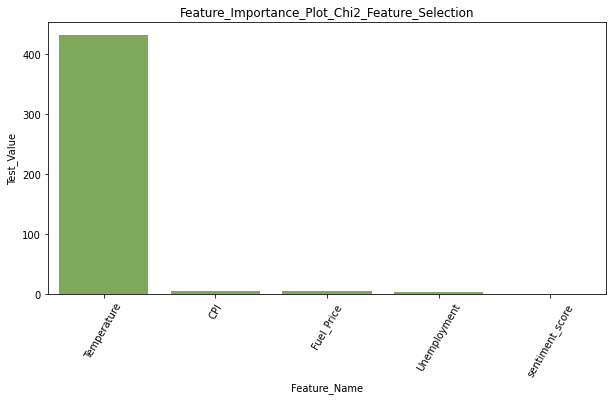

In [ ]:
#plotting test results to check for the important features
chi_scores=[]
for i in range(len(feat_sel_chi.scores_)):
  chi_scores.append(feat_sel_chi.scores_[i])
feature_sel_df_chi=pd.DataFrame(chi_scores,Xtrain.columns)
feature_sel_df_chi.reset_index(inplace=True)
feature_sel_df_chi.columns=["Feature","Test_Value"]
feature_sel_df_chi.sort_values(by="Test_Value",ascending=False,inplace=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax=sns.barplot(feature_sel_df_chi["Feature"],feature_sel_df_chi["Test_Value"],color='#7eb54e')
plt.title("Feature_Importance_Plot_Chi2_Feature_Selection")
plt.xticks(rotation=60)
plt.xlabel("Feature_Name")
plt.show()

In [ ]:
df_train.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,sentiment_score
0,2010-02-05,1.105572e+06,34.037333,2.717844,167.730885,8.619311,0.170057
1,2010-02-12,1.074148e+06,34.151333,2.694022,167.825608,8.619311,0.204635
2,2010-02-19,1.072822e+06,37.719778,2.672067,167.871686,8.619311,0.198576
3,2010-02-26,9.770794e+05,39.243556,2.683933,167.909657,8.619311,0.177870
4,2010-03-05,1.041588e+06,42.917333,2.731200,167.947628,8.619311,0.188255


#### We observe that the feature *-importance-* **sentiment** score for the indicator is very low, so we are choosing to drop this from our modelling since transforming the dataset for incoporating the sentiment score reduces the instances in our dataset considerably so we will do the modelling without the sentiment_score

In [ ]:
# Also checking for the how much variance is explained in the current dataset and by what variable

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data_points = pca.fit_transform(df_train[['Weekly_Sales','Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'sentiment_score']])
explained_variance = pca.explained_variance_ratio_

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


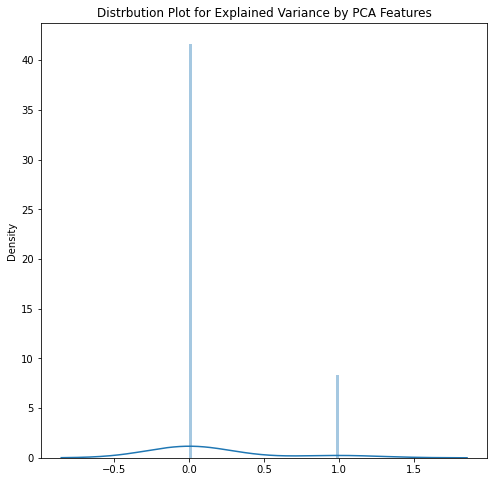

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.distplot(explained_variance)
plt.title("Distrbution Plot for Explained Variance by PCA Features")
plt.show()

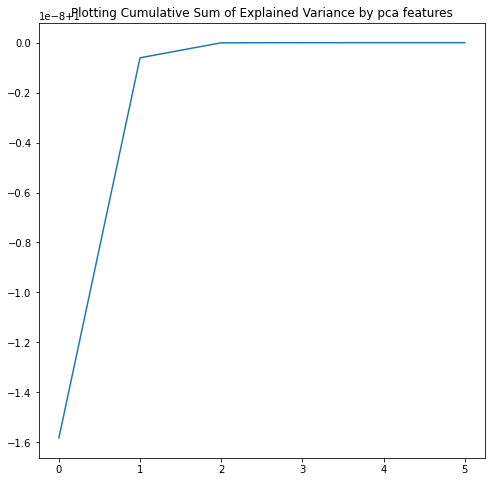

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x=list(range(0,len(explained_variance))),y=np.cumsum(explained_variance))
plt.title("Plotting Cumulative Sum of Explained Variance by pca features")
plt.show()

#### We observe that most of the variance in the transformed dataset is given by 1 variable and the reason for which could be that no of instances have been reduced considerably because of transformation, so we are reverting back to original dataset

#Modelling of Walmart Sales Data (without Twitter indicators)

## Exploratory Data Analysis

We already built the feature report for the continuous variables as was presented early in this document. In this section we are going to build the categorical features report discuss it. Then, we are going to normalize the continuous features and finally, we are going to perform the EDA.

In [ ]:
#Modelling for our dataset
# df=pd.read_csv("/content/drive/MyDrive/Dalhousie_MDI/process_of_ds/data_project/Final_data/Walmart.csv")
df=pd.read_csv("Walmart.csv")

In [ ]:
df=df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   Int64  
 1   Date          6435 non-null   string 
 2   Weekly_Sales  6435 non-null   Float64
 3   Holiday_Flag  6435 non-null   Int64  
 4   Temperature   6435 non-null   Float64
 5   Fuel_Price    6435 non-null   Float64
 6   CPI           6435 non-null   Float64
 7   Unemployment  6435 non-null   Float64
dtypes: Float64(5), Int64(2), string(1)
memory usage: 446.3 KB


In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df=df.astype({'Holiday_Flag': 'string'})
df=df.astype({'Store': 'string'})

#### Categorical Features Report

In [ ]:
#the next block of code (the function) was given by the TA in the lab

def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list())

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        #with warnings.catch_warnings():
            #warnings.simplefilter("ignore", category=RuntimeWarning)
            
            #This is a workaround I don't know why when it used the mode and 2nd mode functions, it returns a 
            #transpose list
        report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [ ]:
build_categorical_features_report(df)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Store,6435,0.0,45,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2,...",6435,100.000000,[],0,0.000000
Date,6435,0.0,143,"[2010-02-05 00:00:00, 2010-02-12 00:00:00, 201...",6435,100.000000,[],0,0.000000
Holiday_Flag,6435,0.0,2,[0],5985,93.006993,[1],450,6.993007


We have only 3 categorical variables, very easy to understand. There are 45 stores, every store has a weekly sale value for each date. There are 143 dates that represents 143 weeks, so the time frame is almost 3 years. Finally, the `Holiday_Flag` variable is a boolean to indicate whether that there is a holiday in that week or no.

#### Normalization and EDA

In [ ]:
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df[['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']]))
scaled_df.columns=['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']

In [ ]:
df[['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']]=scaled_df[['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']]

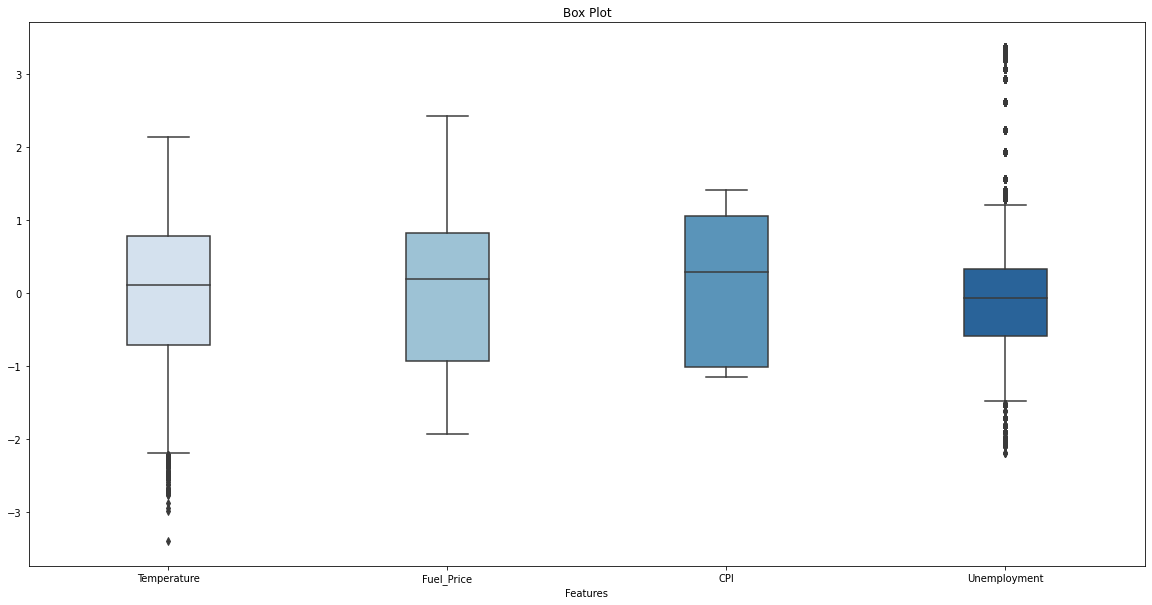

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
ax=sns.boxplot(data=df[['Temperature', 'Fuel_Price', 'CPI',
       'Unemployment']],palette="Blues",saturation=0.75, width=0.3, dodge=True,linewidth=None, whis=1)
ax.set(title="Box Plot",xlabel="Features")
plt.show()

In [ ]:
fig = px.histogram(df, x="Weekly_Sales")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Weekly Sales vs Fuel Price",
                                   "Weekly Sales vs Temperature", 
                                   "Weekly Sales vs CPI",
                                   "Weekly Sales vs Unemployment",))

fig.add_trace(go.Scatter(x=df['Fuel_Price'], y=df["Weekly_Sales"], mode="markers"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df['Temperature'], y=df["Weekly_Sales"], mode="markers"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df['CPI'], y=df["Weekly_Sales"], mode="markers"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df['Unemployment'], y=df["Weekly_Sales"], mode="markers"),
              row=2, col=2)


fig.show()

In [ ]:
fig = px.box(df, x="Store", y="Weekly_Sales")
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   string        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   Float64       
 3   Holiday_Flag  6435 non-null   string        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: Float64(1), datetime64[ns](1), float64(4), string(2)
memory usage: 408.6 KB


In [ ]:
aggre=df.loc[:,['Holiday_Flag','Weekly_Sales']]
r=[]
for index, x in aggre.iterrows():
    if (x[0]=='1'):
        r.append(x[1]);
    else:
        r.append(0);

z=np.array(r)

df['Weekly_Sales_Hol']=r

In [ ]:
df_temp=df.loc[:,['Date','Weekly_Sales']]
df_sum_date=df_temp.groupby(['Date']).sum()
df_temp=df.loc[:,['Date','Weekly_Sales_Hol']]
df_sumhol_date=df_temp.groupby(['Date']).sum()

In [ ]:
fig = go.Figure([
    go.Scatter(
        name='Sum of Stores Weekly Sales',
        x=df_sum_date.index,
        y=df_sum_date['Weekly_Sales'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Sales on Holiday',
        x=df_sumhol_date.index,
        y=df_sumhol_date['Weekly_Sales_Hol'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        fill='tonexty',
        showlegend=False
    ),
])
fig.update_layout(
    yaxis_title='US Dollars',
    title='Total Weekly Sales by Date',
    hovermode="x"
)
fig.show()

The weekly sales data could be seen as a time series, so we have plotted the total weekly sales (sum of sales of every store in each week) to identify if there are cycles or/and if there is a pattern that depends on the time. From the graphic we couldn't identify a dependency on the time, except for the spikes generated by the holidays in November and December.

What we found gives us a hint that the sales are not correlated with the date but with other features, and that is what we will try to find in the next section.

####4th Experiment Modelling Weekly Sales 

As we explained in the last section, now we are going to model the target variable `Weekly Sales` as a function of all the other features except time, so we will drop the column `Date`

In [ ]:
dfm=df.drop(columns=["Date","Weekly_Sales_Hol"])

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring="r2",
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    return plt

In [ ]:
# Encode categorical features
encoder = OrdinalEncoder()
cat_cols = dfm.select_dtypes("string").columns
dfm[cat_cols] = encoder.fit_transform(dfm[cat_cols])

In [ ]:
X = dfm.drop(columns="Weekly_Sales")
Y = dfm['Weekly_Sales']

# we split the data that we used to train, validate and test all the models
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
grid = {
#     'n_estimators':['1','3','5','10'],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_features':['sqrt', 'log2', 'None', '1'],
#     'min_impurity_decrease':['0','0.01','0.05']
}

clf = RandomForestRegressor()
rf_cv = GridSearchCV(clf, grid, cv = 5, scoring='r2')
rf_cv.fit(x_train,y_train)
print("Best Parameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)

In [ ]:
clf = RandomForestRegressor(criterion='poisson', max_features='sqrt')
clf = clf.fit(X, Y)

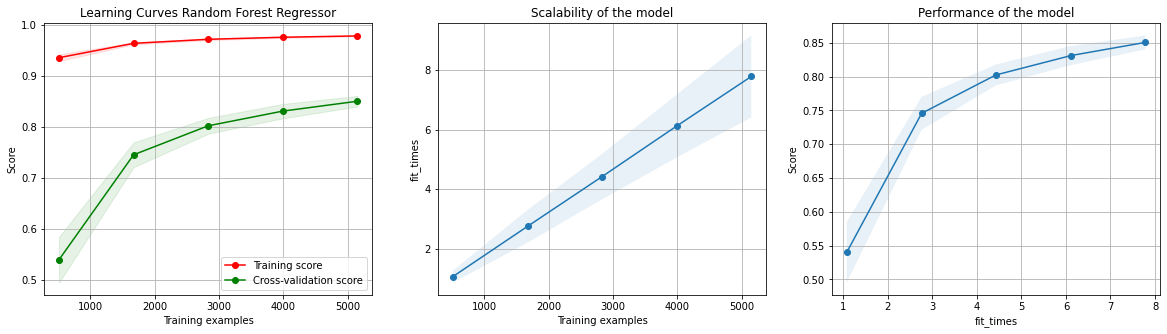

In [ ]:
title = "Learning Curves Random Forest Regressor"
estimator = clf
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, Y, cv=cv, n_jobs=4)
plt.show()

### 3rd experiment. Correlation between sales spikes with Compound Sentiment score

For this experiment, the hypothesis is: “There is a correlation between the compound score (twitter) and the peaks in sales”. The idea behind proposed this experiment is that maybe during the *regular days* (not peaks) twitter data it is not relevant in the purchase bahavior but could be related to the sales in peak weeks. 

In [ ]:
mean_sales=df_sum_date['Weekly_Sales'].mean()
median_sales=df_sum_date['Weekly_Sales'].median()

fig = go.Figure([
    go.Scatter(
        name='Sum of Stores Weekly Sales',
        x=df_sum_date.index,
        y=df_sum_date['Weekly_Sales'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Mean',
        x=df_sum_date.index,
        y=[mean_sales] * len(df_sum_date['Weekly_Sales']),
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Median',
        x=df_sum_date.index,
        y=[median_sales] * len(df_sum_date['Weekly_Sales']),
        mode='lines',
        marker=dict(color="red"),
        line=dict(width=1),
        showlegend=True
    ),
])
fig.update_layout(
    yaxis_title='US Dollars',
    title='Total Weekly Sales by Date',
    hovermode="x"
)
fig.show()

In [ ]:
mean_sales=df_sum_date['Weekly_Sales'].mean()
std_sales=df_sum_date['Weekly_Sales'].std()

y_upper=[mean_sales+0.5*std_sales] * len(df_sum_date.index)
y_lower=[mean_sales-0.5*std_sales] * len(df_sum_date.index)

fig = go.Figure([
    go.Scatter(
        name='Sum of Stores Weekly Sales',
        x=df_sum_date.index,
        y=df_sum_date['Weekly_Sales'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=df_sum_date.index,
        y=y_upper,
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=df_sum_date.index,
        y=y_lower,
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])
fig.update_layout(
    yaxis_title='US Dollars',
    title='Total Weekly Sales by Date',
    hovermode="x"
)
fig.show()

So first, we identified and selected the peaks in sales. For this we use the following criteria, every point greater than the mean + 0.5 * std (The upper bound in the graph) is a peak.

In [ ]:
df_spikes=df_sum_date.loc[df_sum_date['Weekly_Sales']>mean_sales+0.5*std_sales]
print(len(df_spikes))
df_spikes.head()

15


,Weekly_Sales
Date,
2010-04-02,50423831.26
2010-06-04,50188543.12
2010-11-26,65821003.24
2010-12-03,49909027.88
2010-12-10,55666770.39


In [ ]:
# df_twitter_e4b=df_twitter_e4

,compound
Date,
2010-04-02,0.171078
2010-06-04,0.235663
2010-11-26,0.229335
2010-12-03,0.207587
2010-12-10,0.221964
2010-12-17,0.210935
2010-12-24,0.197425
2011-11-25,0.194500
2011-12-09,0.188376


In [ ]:
# df_twitter_e4=df_twitter_e4b
df_twitter_e4['Date']=pd.to_datetime(df_twitter_e4['Date'],format='%Y-%m-%d')

In [ ]:
df_twitter_e4=df_twitter_e4.loc[df_twitter_e4["Date"].isin(df_spikes.index)]
df_twitter_e4=df_twitter_e4.groupby('Date').sum()
df_spikes = pd.concat([df_spikes, df_twitter_e4], axis=1, join='inner')
df_spikes.dropna(inplace=True)

We performed a non-parametric test (Spearman), we chose this test because it is a small dataset and we cannot asummed normality in their distributions.

In [ ]:
# calculate spearman's correlation
coef, p = spearmanr(df_spikes['Weekly_Sales'], df_spikes['compound'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

# df_spikes.corr(method='pearson')

Spearmans correlation coefficient: 0.111
Samples are uncorrelated (fail to reject H0) p=0.694
